In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.insert(0, '../../../../')
from copy import deepcopy
import datetime
from helpers.ipython_helpers import (
    print_full
)
from helpers.rating_model_helpers import (
    RatingModelTrainer,
    run_trainers
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Read Data

In [2]:
original_features_df = pd.read_csv("../../../../../data/credit_rating/intermediate_data/annual_credit_rating_features.csv")

******************************entire test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.1454,0.1454,0.1454
macro,0.1470,0.1634,0.1314
weighted,0.1726,0.1454,0.1463


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.07      0.47      0.12        62
        2.0       0.04      0.15      0.06       103
        3.0       0.06      0.14      0.09       145
        4.0       0.09      0.20      0.12       284
        5.0       0.11      0.25      0.15       523
        6.0       0.08      0.11      0.10       574
        7.0       0.14      0.14      0.14       875
        8.0       0.17      0.15      0.16      1225
        9.0       0.13      0.10      0.11       934
       10.0       0.11      0.06      0.08       682
       11.0       0.17      0.12      0.14       942
       12.0       0.21      0.17      0.19      1096
       13.0       0.24      0.23      0.24       973
       14.0       0.36      0.11      0.17       819
       15.0       0.16      0.02      0.04       389
       16.0       0.21      0.18      0.19       192

avg / total       0.17      0.15      0.15      9818

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,29,10,3,6,6,2,5,1,0,0,0,0,0,0,0,0
2,25,15,20,11,20,5,2,2,2,1,0,0,0,0,0,0
3,40,25,20,20,18,10,5,2,3,1,1,0,0,0,0,0
4,70,35,20,57,42,26,10,11,5,5,1,1,0,0,0,1
5,64,57,40,85,132,44,42,29,12,5,7,3,2,0,1,0
6,56,53,46,67,122,66,58,60,23,5,7,6,2,0,1,2
7,58,48,46,112,185,111,125,101,39,19,11,10,6,2,1,1
8,38,60,58,112,247,156,184,189,84,32,35,17,12,0,1,0
9,17,28,33,57,149,125,115,177,91,39,40,37,21,4,1,0
10,14,13,10,42,89,80,83,105,73,40,64,31,29,3,4,2


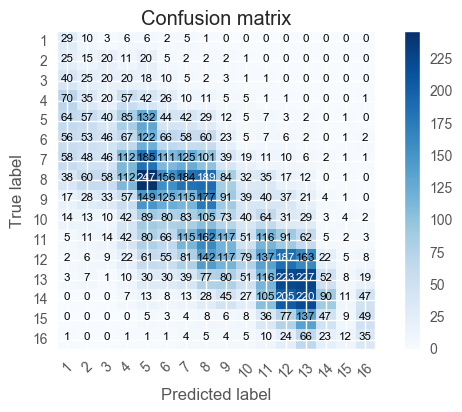

******************************delta test set - whole model******************************


,Precision,Recall,F1 Score
micro,0.0337,0.0337,0.0337
macro,0.0406,0.0307,0.0319
weighted,0.0490,0.0337,0.0371


Detailed classification report:
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        33
        2.0       0.00      0.00      0.00        88
        3.0       0.01      0.02      0.01       128
        4.0       0.01      0.03      0.02       234
        5.0       0.01      0.03      0.02       403
        6.0       0.01      0.01      0.01       513
        7.0       0.02      0.02      0.02       765
        8.0       0.04      0.03      0.03      1070
        9.0       0.03      0.02      0.02       860
       10.0       0.03      0.02      0.02       652
       11.0       0.05      0.04      0.04       858
       12.0       0.06      0.05      0.05       955
       13.0       0.08      0.08      0.08       808
       14.0       0.16      0.04      0.06       759
       15.0       0.02      0.00      0.00       381
       16.0       0.13      0.11      0.12       176

avg / total       0.05      0.03      0.04      8683

Confusion M

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0,10,3,6,6,2,5,1,0,0,0,0,0,0,0,0
2,25,0,20,11,20,5,2,2,2,1,0,0,0,0,0,0
3,40,25,3,20,18,10,5,2,3,1,1,0,0,0,0,0
4,70,35,20,7,42,26,10,11,5,5,1,1,0,0,0,1
5,64,57,40,85,12,44,42,29,12,5,7,3,2,0,1,0
6,56,53,46,67,122,5,58,60,23,5,7,6,2,0,1,2
7,58,48,46,112,185,111,15,101,39,19,11,10,6,2,1,1
8,38,60,58,112,247,156,184,34,84,32,35,17,12,0,1,0
9,17,28,33,57,149,125,115,177,17,39,40,37,21,4,1,0
10,14,13,10,42,89,80,83,105,73,10,64,31,29,3,4,2


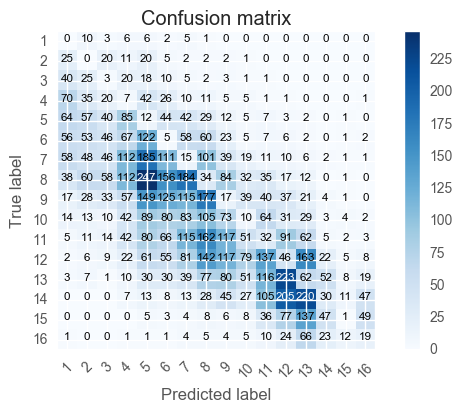

In [9]:
balanced_model = RandomForestClassifier(class_weight='balanced')
trainer_whole_balanced = RatingModelTrainer(original_features_df, balanced_model, output_type='windsorized_ranking', dev_type='whole')
run_trainers([trainer_whole_balanced], ["whole"])